In [1]:
# Install statsmodels if it's not already installed (usually pre-installed in Colab)
# !pip install statsmodels

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
# Define the file path
file_path = "/2) Stock Prices Data Set.csv"

# Load the dataset
df = pd.read_csv(file_path)

# --- Preprocessing ---
# Convert 'date' to datetime and set as index
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

# Select a single time series for analysis (Apple's Close Price)
ts_data = df[df['symbol'] == 'AAPL']['close']

print("Selected Time Series (AAPL Close Price) Head:")
print(ts_data.head())

Selected Time Series (AAPL Close Price) Head:
date
2014-01-02    79.0185
2014-01-03    77.2828
2014-01-06    77.7042
2014-01-07    77.1481
2014-01-08    77.6371
Name: close, dtype: float64


In [ ]:
# Perform seasonal decomposition
decomposition = seasonal_decompose(ts_data, model='multiplicative', period=252) # Assuming roughly 252 trading days in a year for annual seasonality

# Plot the decomposed components
fig = decomposition.plot()
plt.show()

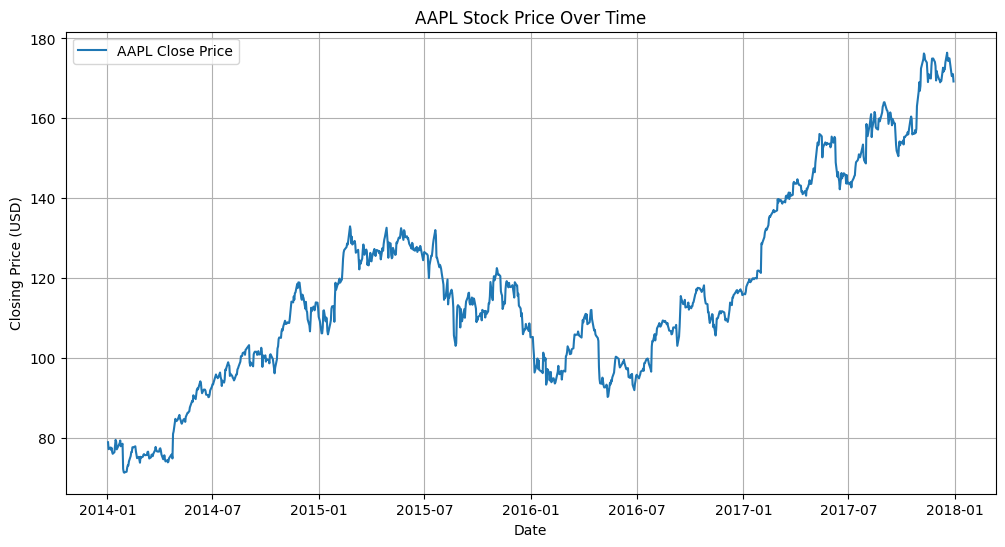

Pattern Identification: The plot shows a clear upward **trend** over the period, with noticeable **volatility** (periods of sharp increases and decreases).


In [6]:
# ----------------------------------------------------------------------
# Objective 1: Plot time-series data and identify patterns
# ----------------------------------------------------------------------
plt.figure(figsize=(12, 6))
plt.plot(ts_data, label='AAPL Close Price')
plt.title('AAPL Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.savefig('stock_price_plot.png')
plt.show()

print("Pattern Identification: The plot shows a clear upward **trend** over the period, with noticeable **volatility** (periods of sharp increases and decreases).")

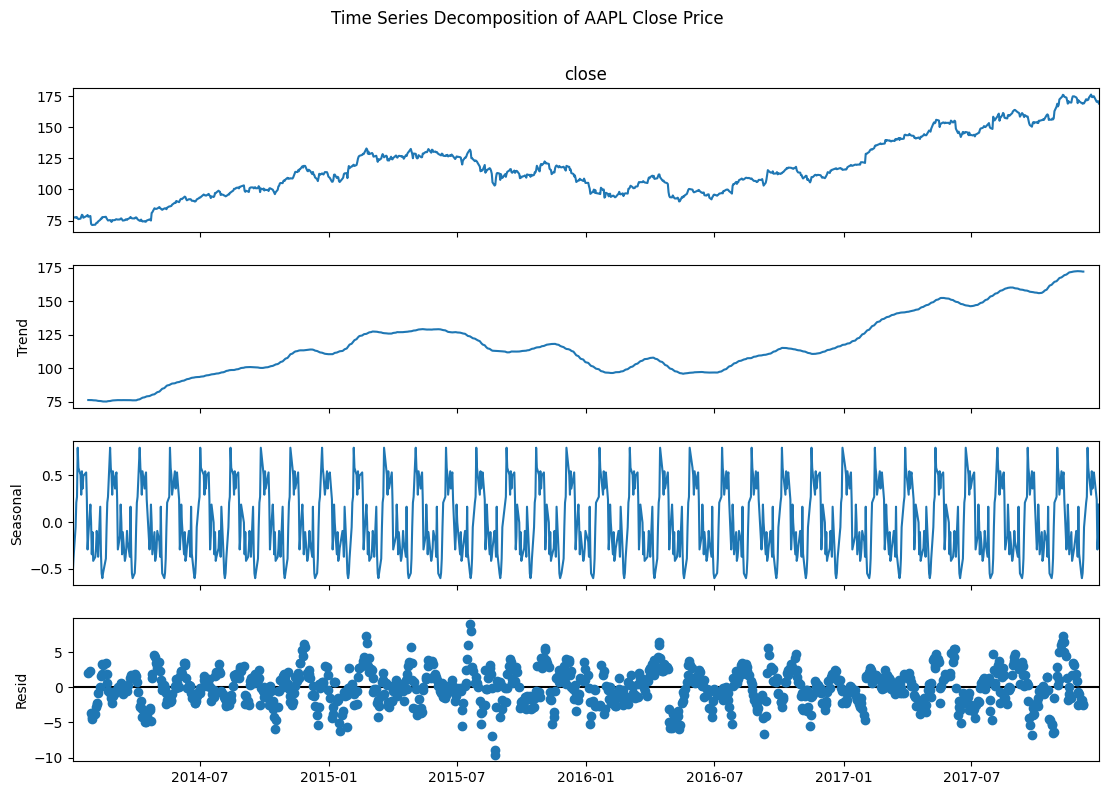

In [7]:
# ----------------------------------------------------------------------
# Objective 2: Decompose the series into trend, seasonality, and residuals
# Note: For daily stock data, a 'period' of 30 is used as a proxy for short-term cycles/seasonality
# ----------------------------------------------------------------------
try:
    decomposition = seasonal_decompose(ts_data, model='additive', period=30)

    # Plot the decomposition components
    fig = decomposition.plot()
    fig.set_size_inches(12, 8)
    fig.suptitle('Time Series Decomposition of AAPL Close Price', y=1.02)
    plt.savefig('ts_decomposition.png')
    plt.show()

except Exception as e:
    print(f"Could not perform decomposition due to: {e}")
    print("This often happens when the data doesn't perfectly align with the chosen period. Try resampling or checking data frequency.")

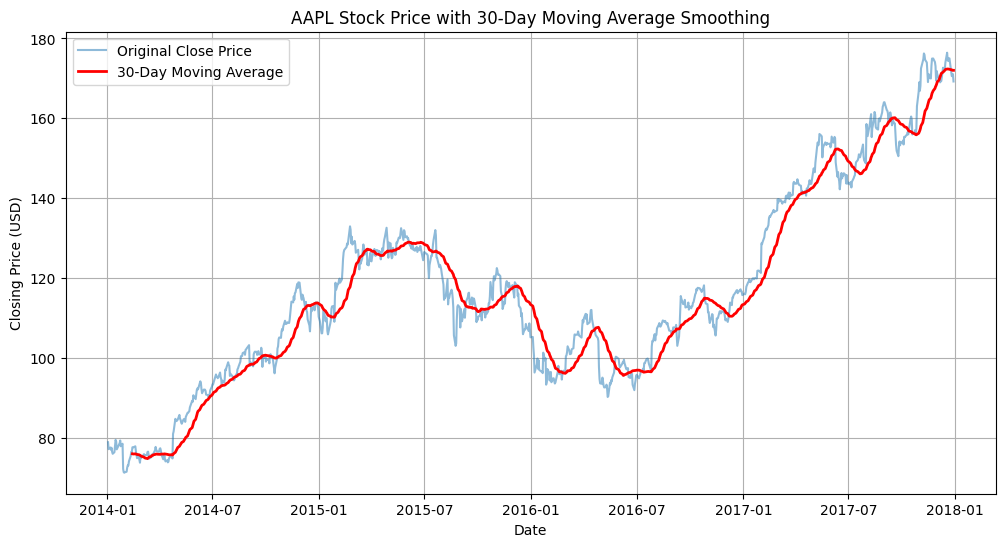


--- Summary of Smoothing ---
The 30-Day Moving Average plot clearly **smoothes out the daily price volatility**, making the long-term **upward trend** of the stock much easier to visualize and analyze.


In [8]:
# ----------------------------------------------------------------------
# Objective 3: Perform moving average smoothing and plot the results
# ----------------------------------------------------------------------

# Calculate a 30-day (approximately 1 month) Simple Moving Average (SMA)
ts_data_smoothed = ts_data.rolling(window=30).mean()

# Plot the original data and the smoothed data
plt.figure(figsize=(12, 6))
plt.plot(ts_data, label='Original Close Price', alpha=0.5)
plt.plot(ts_data_smoothed, label='30-Day Moving Average', color='red', linewidth=2)
plt.title('AAPL Stock Price with 30-Day Moving Average Smoothing')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.savefig('moving_average_plot.png')
plt.show()

print("\n--- Summary of Smoothing ---")
print("The 30-Day Moving Average plot clearly **smoothes out the daily price volatility**, making the long-term **upward trend** of the stock much easier to visualize and analyze.")